<a href="https://colab.research.google.com/github/elifkaradenizz/sigorta-saglayici-analizi/blob/main/SigortaSa%C4%9Flay%C4%B1c%C4%B1Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_path = '/content/drive/MyDrive/sigorta_saglayıcı/healthcare_dataset.csv'

# CSV dosyasını okuma (UTF-8 karakter kodlamasıyla)
df = pd.read_csv(csv_path)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55500, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000


In [7]:
print(df.dtypes)


Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [8]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [9]:
df['Date of Admission'].dtype

dtype('<M8[ns]')

In [10]:
print(df.dtypes)

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date                object
Medication                    object
Test Results                  object
dtype: object


In [11]:
# NaN değerleri kontrol etme

nan_columns = df.columns[df.isna().any()]


print("\nNaN Değerleri İçeren Sütunlar:")
print(nan_columns)


NaN Değerleri İçeren Sütunlar:
Index([], dtype='object')


In [12]:
# NaN değerlerini sayma
nan_counts = df.isna().sum()

print("Sütunlardaki NaN Değer Sayıları:")
print(nan_counts)


Sütunlardaki NaN Değer Sayıları:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [13]:
df["Insurance Provider"].value_counts() #Benzersiz değerlerin sayısını verir.

,count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


In [14]:
df["Medical Condition"].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


In [15]:
df["Billing Amount"].value_counts()

,count
Billing Amount,
8926.285937,2
50762.528342,2
24366.680481,2
14042.748908,2
18253.980486,2
...,...
43748.820505,1
8416.227513,1
25815.037193,1


In [24]:
# Sigorta sağlayıcılarına göre gruplandırma
grouped = df.groupby('Insurance Provider')['Billing Amount']

# Temel istatistikleri hesaplama
statistics = grouped.agg(['mean', 'median', 'std', 'min', 'max', 'count'])
statistics = statistics.sort_values(by='mean', ascending=False)
print(statistics)


                            mean        median           std          min  \
Insurance Provider                                                          
Medicare            25615.990508  25592.810719  14142.480543 -1277.645337   
Blue Cross          25613.011503  25594.699731  14113.622237 -1660.009373   
Aetna               25553.294506  25786.388779  14269.230818 -2008.492140   
Cigna               25525.766314  25545.200901  14241.214680 -1520.420555   
UnitedHealthcare    25389.172390  25185.491443  14291.568769 -1428.843941   

                             max  count  
Insurance Provider                       
Medicare            52092.669896  11154  
Blue Cross          52764.276736  11059  
Aetna               52211.852966  10913  
Cigna               52170.036854  11249  
UnitedHealthcare    52373.032374  11125  


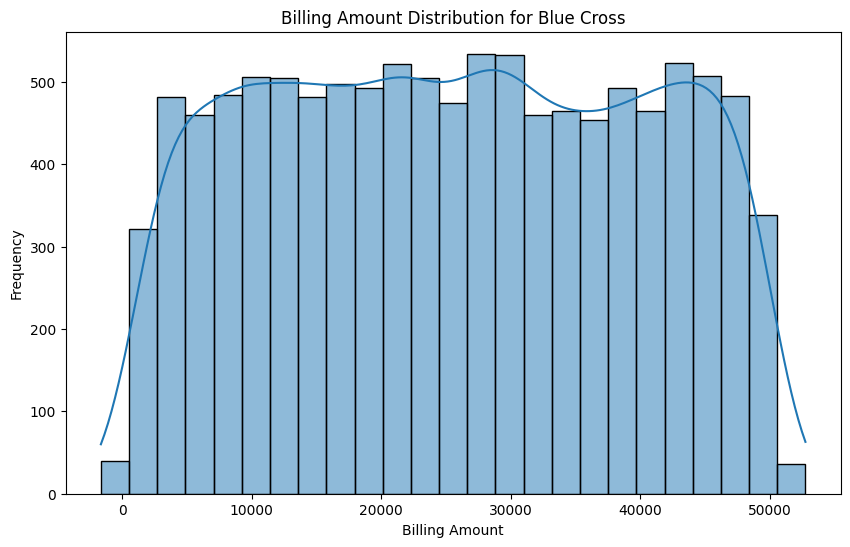

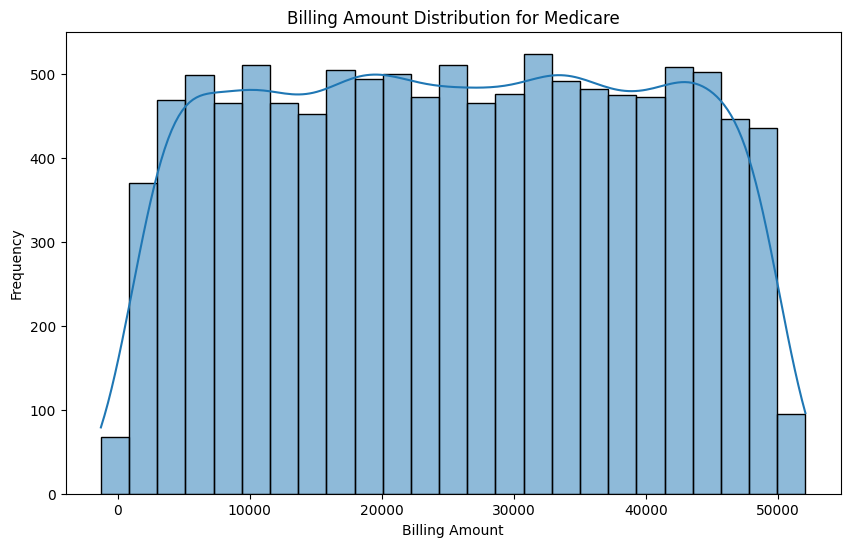

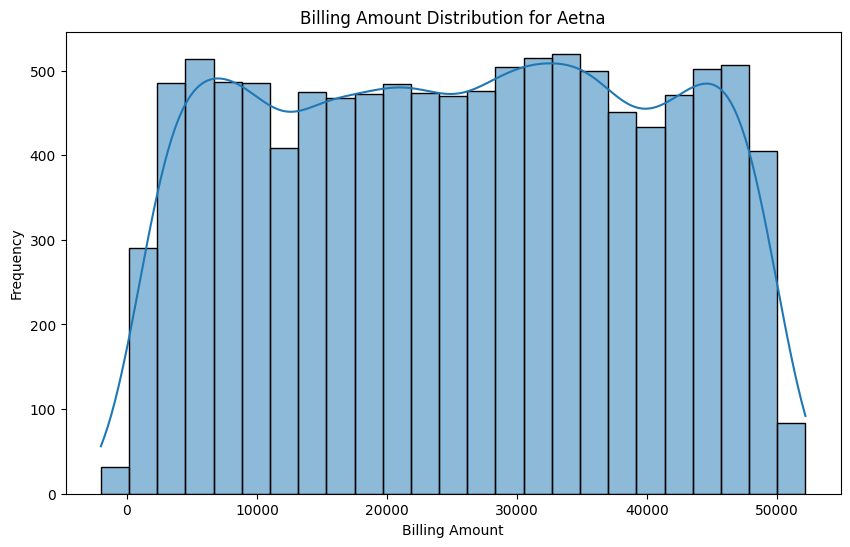

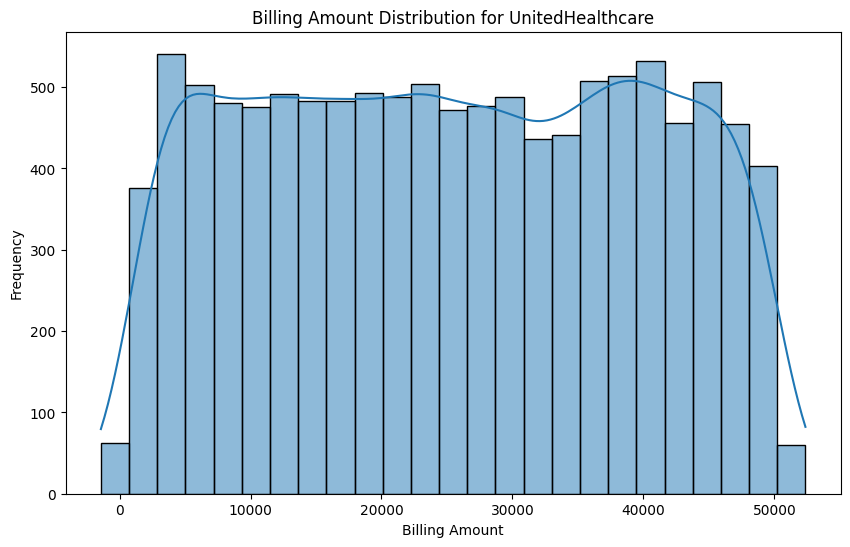

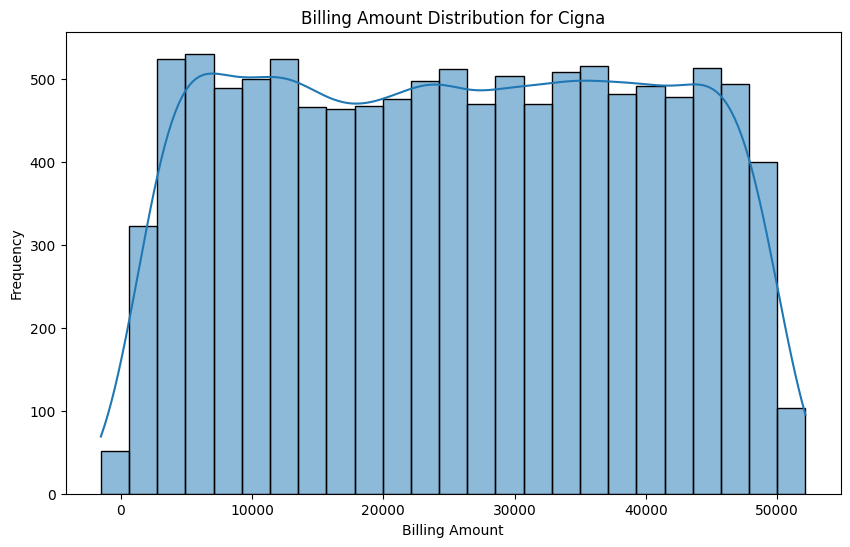

In [23]:
# Sigorta sağlayıcılarına göre veri gruplama
for provider in df['Insurance Provider'].unique():
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Insurance Provider'] == provider]['Billing Amount'], kde=True)
    plt.title(f'Billing Amount Distribution for {provider}')
    plt.xlabel('Billing Amount')
    plt.ylabel('Frequency')
    plt.show()

